### The goal of this XP:
- Create a template image for functional QC in zooniverse platform - Brain Match 

In [70]:
clear all
% build path
addpath(genpath('../Misc'))
build_path  niak psom zooniverse_qc  

Adding library niak to the search path.

Adding library psom to the search path.

Adding library zooniverse_qc to the search path.



In [71]:
% Set parameters
#path_root = '/home/yassinebha/Drive/QC_zooniverse/';
path_root = '/media/yassinebha/database29/Drive/QC_zooniverse/';
param.transparency = 0.7;
param.perc_min = 0.05;
param.perc_max = 0.95;

### Invert func template image

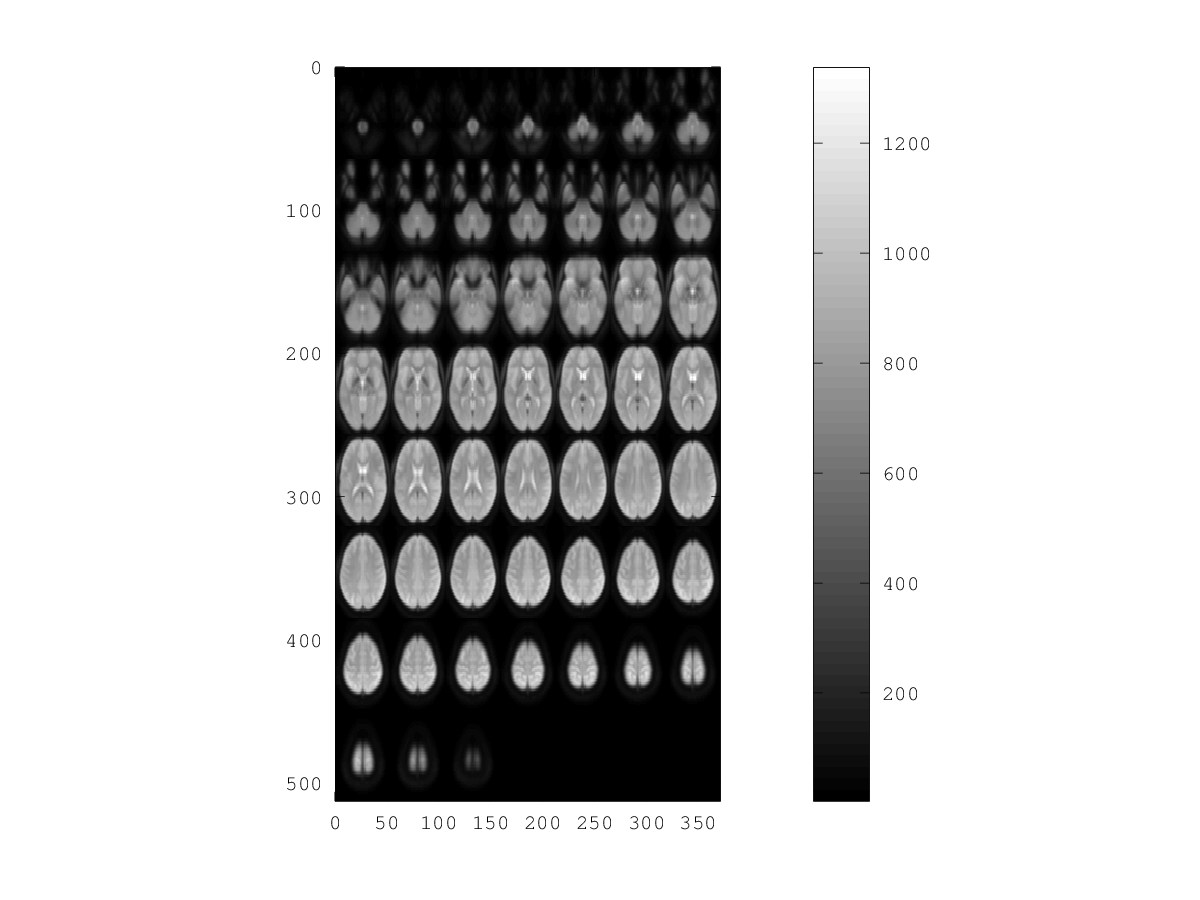

In [72]:
% Input images
[hdr,vol] = niak_read_vol([path_root 'template_layout/test_data/group_coregistration/func_mean_average_stereonl.nii.gz']);
[hdr,mask] = niak_read_vol([path_root 'template_layout/test_data/group_coregistration/func_mask_group_stereonl.nii.gz']);
opt.type_color = 'gray';
niak_montage(vol,opt)

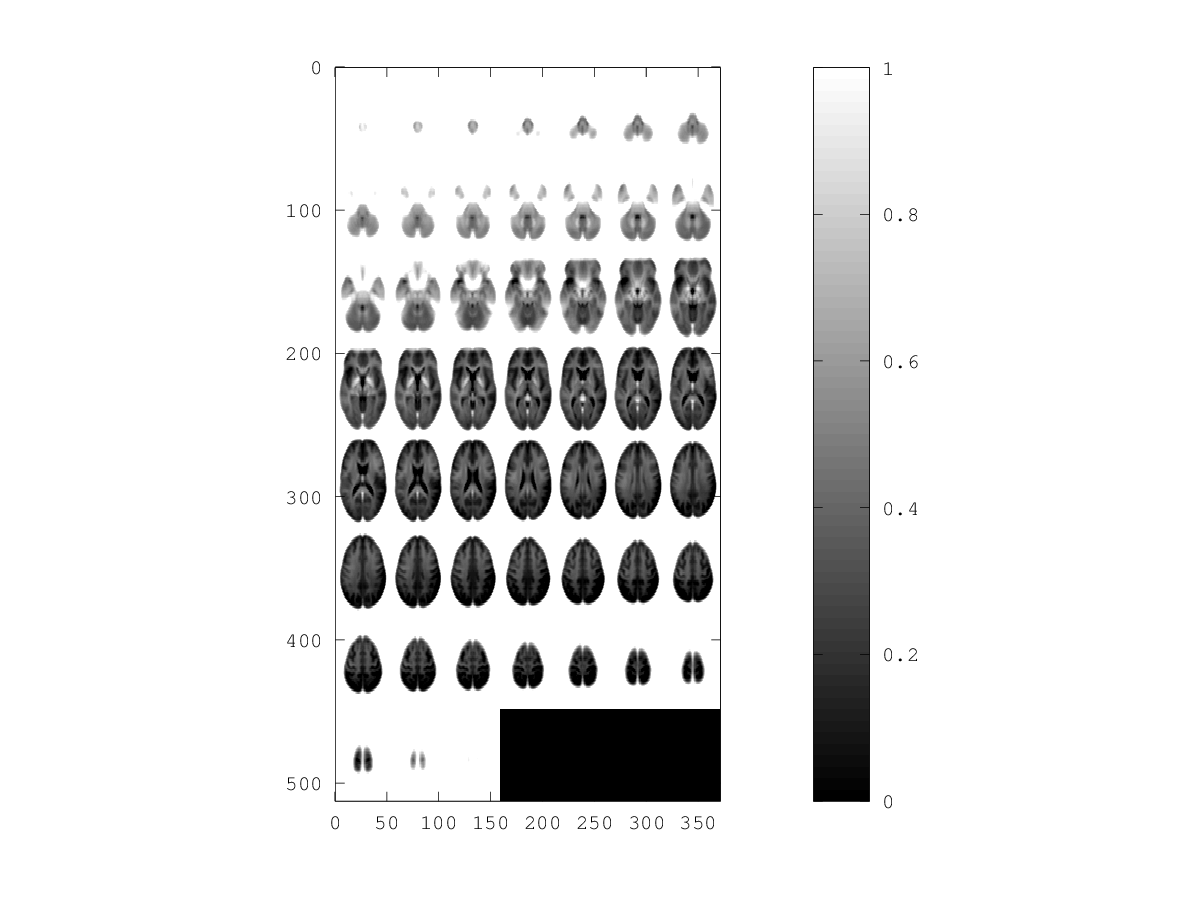

In [73]:
% Invert contrast
mask = mask>0;
val = sort(vol(mask),'ascend');
vmin = val(round(param.perc_min*length(val)));
vmax = val(round(param.perc_max*length(val)));
vol(vol<vmin) = vmin;
vol(vol>vmax) = vmax;
vol(mask) = (vol(mask) - vmin)/(vmax-vmin);
vol(~mask) = 0;
vol = 1 - vol;
vol = (abs(vol));
niak_montage(vol,opt)
hdr.file_name = [path_root 'template_layout/test_data/func_mean_average_stereonl_inv.nii.gz'];
niak_write_vol(hdr,vol);

### Create montage of the func template image

In [74]:
clear jin jout jopt
% Input
niak_gb_vars
jin.source = [path_root 'template_layout/test_data/func_mean_average_stereonl_inv.nii.gz'];
jin.target = [ GB_NIAK.path_niak filesep 'template' filesep 'mni-models_icbm152-nl-2009-1.0' filesep ...
'mni_icbm152_t1_tal_nlin_sym_09a.mnc.gz'];

% Output
jout = [path_root 'template_layout/test_data/func_mean_average_stereonl.png'];

% Options
jopt.colormap = 'gray';
jopt.colorbar = false;
jopt.limits = 'adaptative';
jopt.flag_decoration = false;
jopt.padding = true;
jopt.coord =[-30 , -65 , -15 ; 
             -8 , -25 ,  10 ;  
             30 ,  45 ,  60];
             
% The generation of the montage itself
niak_brick_vol2img(jin,jout,jopt);

    __imwrite__ at line 201 column 3
    imwrite at line 111 column 5
    niak_brick_vol2img at line 143 column 5


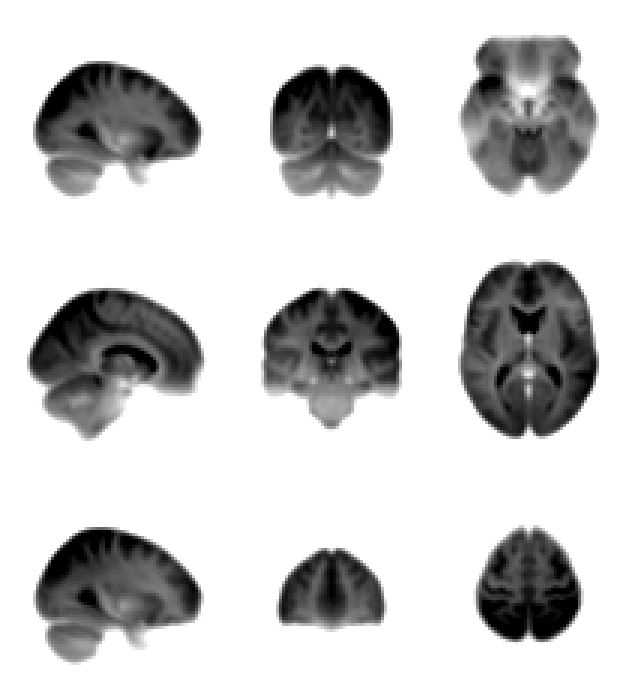

In [75]:
imshow([path_root 'template_layout/test_data/func_mean_average_stereonl.png'])

### Add outline as overlay to func template

In [77]:
%% Add overlay to func 
clear jin jout jopt
jin.background =  [path_root 'template_layout/test_data/func_mean_average_stereonl.png'];
jin.overlay = [path_root 'template_layout/layout/mask_layout/mask_all_layout_v2_smoothed.png'];
jout = [path_root 'template_layout/test_data/func_mean_average_stereonl_outline.png'];
jopt.transparency = param.transparency;
jopt.threshold = 0.9;
niak_brick_add_overlay(jin,jout,jopt);

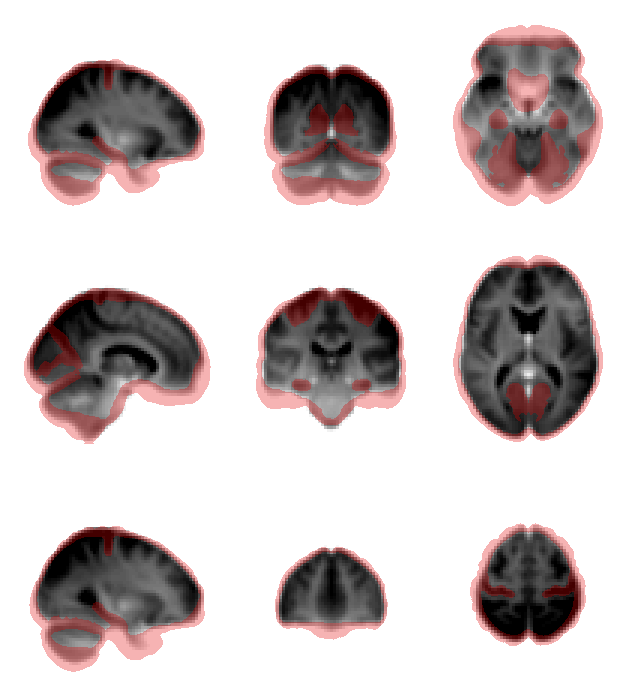

In [78]:
imshow([path_root 'template_layout/test_data/func_mean_average_stereonl_outline.png'])

### Invert a sample subject func image

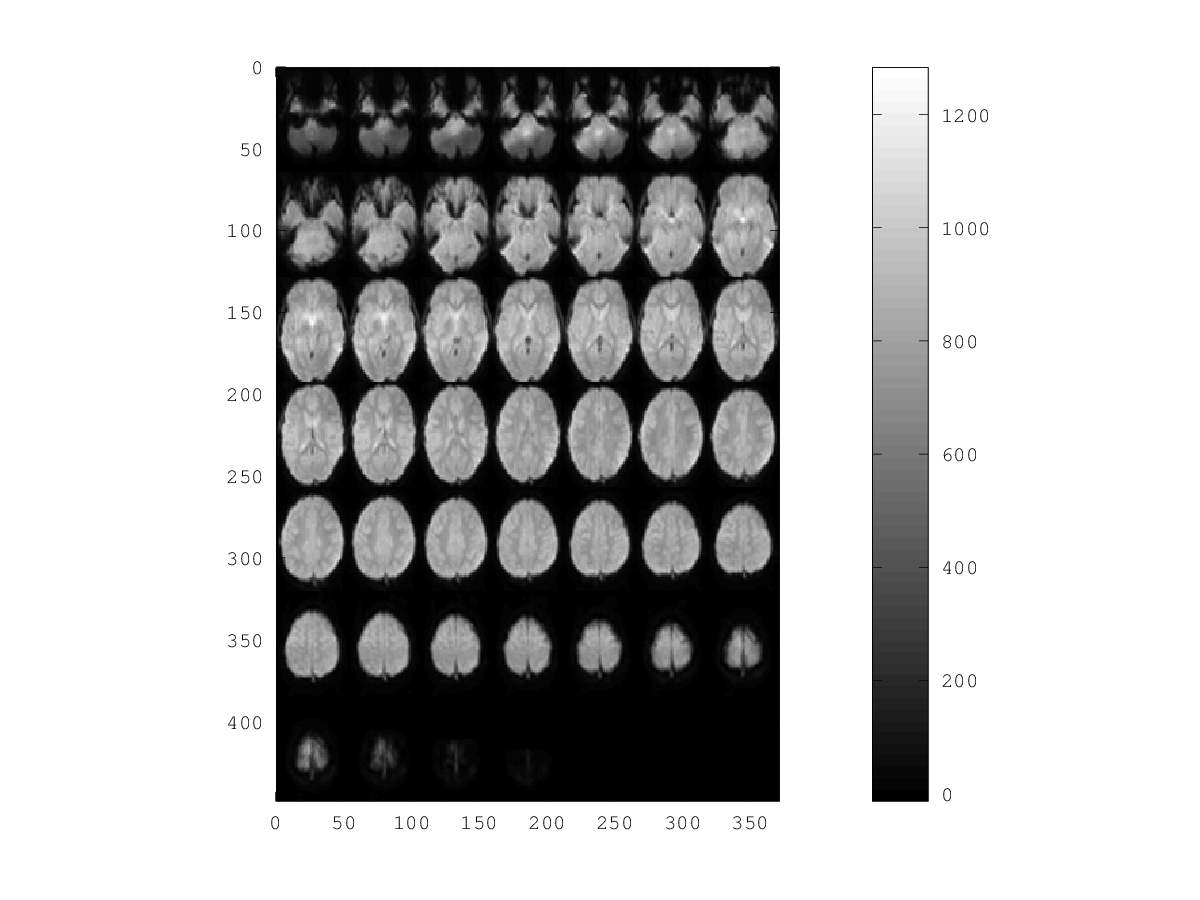

In [85]:
% Subject Invert image
[hdr,vol] = niak_read_vol([path_root 'template_layout/test_data/func_X_0015002_mean_stereolin.nii.gz']);
[hdr,mask] = niak_read_vol([path_root 'template_layout/test_data/func_mask_group_stereonl.nii.gz']);
% View
opt.type_color = 'gray';
niak_montage(vol,opt)

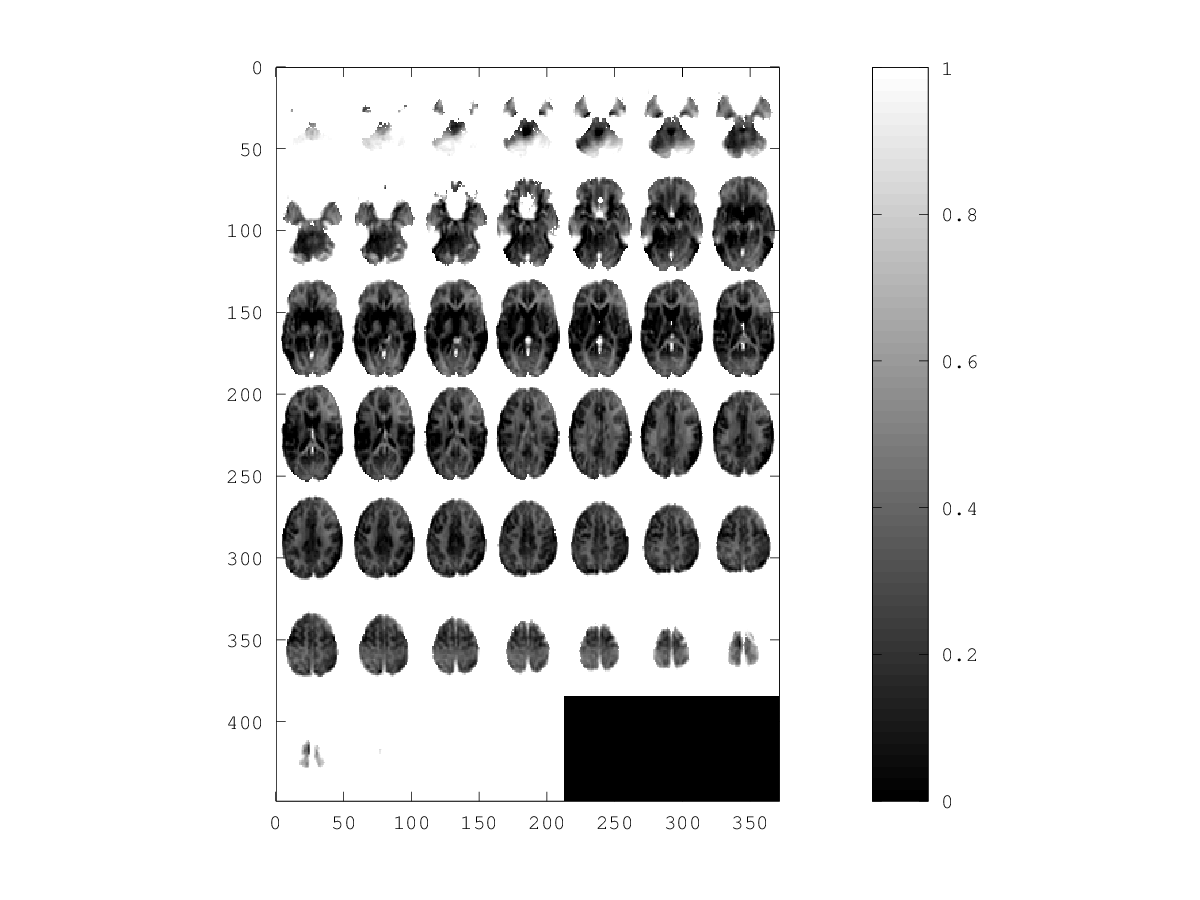

In [86]:
mask = mask>0;
val = sort(vol(mask),'ascend');
vmin = val(round(param.perc_min*length(val)));
vmax = val(round(param.perc_max*length(val)));
vol(vol<vmin) = vmin;
vol(vol>vmax) = vmax;
vol(mask) = (vol(mask) - vmin)/(vmax-vmin);
vol(~mask) = 0;
vol = 1 - vol;
vol = (abs(vol));
opt.type_color = 'gray';
niak_montage(vol,opt)
hdr.file_name = [path_root 'template_layout/test_data/func_X_0015002_mean_stereonl_inv.nii.gz'];
niak_write_vol(hdr,vol);

### Create montage from subject func inverted image

In [87]:
% Create montage for the image
clear jin jout jopt
% Input
jin.source = [path_root 'template_layout/test_data/func_X_0015002_mean_stereonl_inv.nii.gz'];
jin.target = [ GB_NIAK.path_niak filesep 'template' filesep 'mni-models_icbm152-nl-2009-1.0' filesep ...
'mni_icbm152_t1_tal_nlin_sym_09a.mnc.gz'];

% Output
jout = [path_root 'template_layout/test_data/func_X_0015002_mean_stereonl.png'];

% Options
jopt.colormap = 'gray';
jopt.colorbar = false;
jopt.limits = 'adaptative';
jopt.flag_decoration = false;
jopt.padding = true;
jopt.coord =[-30 , -65 , -15 ; 
             -8 , -25 ,  10 ;  
             30 ,  45 ,  60];
             
% The generation of the montage itself
niak_brick_vol2img(jin,jout,jopt);

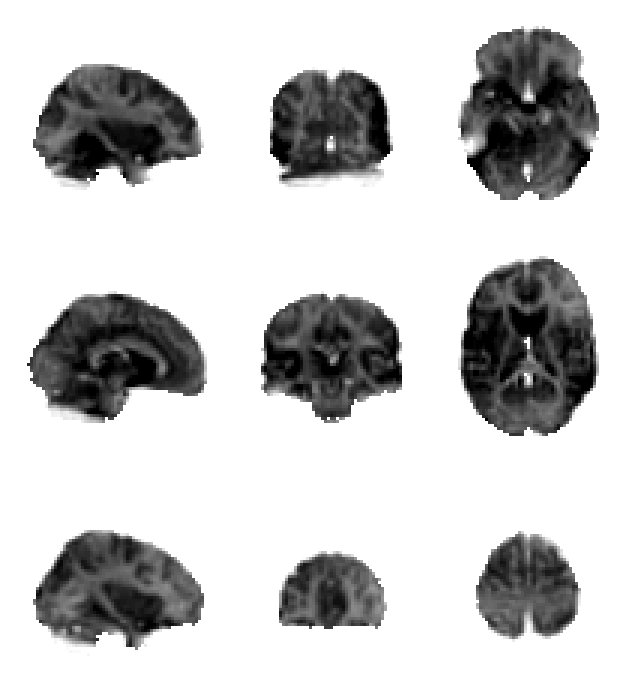

In [88]:
imshow([path_root 'template_layout/test_data/func_X_0015002_mean_stereonl.png'])

### Add layout overlay

In [89]:
%% Add overlay 
clear jin jout jopt
jin.background =[path_root 'template_layout/test_data/func_X_0015002_mean_stereonl.png'];
jin.overlay =jin.overlay = [path_root 'template_layout/layout/mask_layout/mask_all_layout_v2_smoothed.png'];
jout = [path_root 'template_layout/test_data/func_X_0015002_mean_stereonl_outline.png'];
jopt.transparency = param.transparency ;
jopt.threshold = 0.9;
niak_brick_add_overlay(jin,jout,jopt);

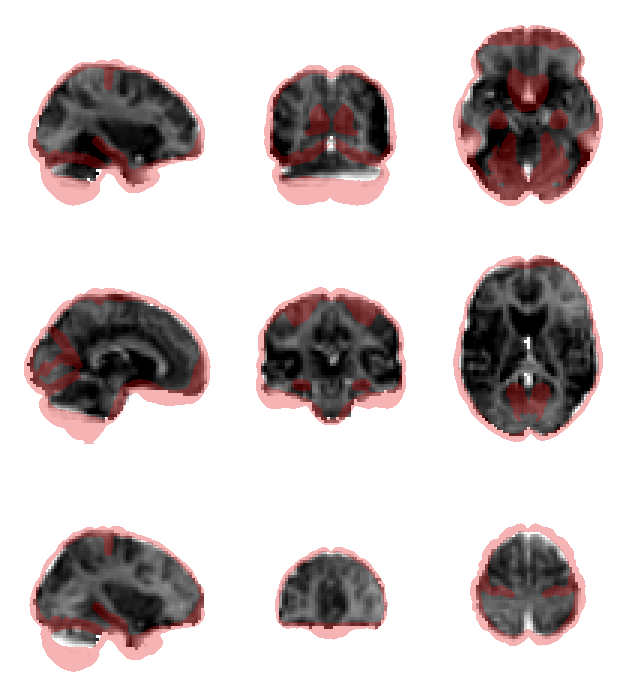

In [90]:
imshow(jout)